In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression

# LogisticRegression feature selection

In [13]:
wine = load_wine()
print(list(wine.target_names))
print(wine.data)
wine.target[ wine.target ==0 ] = 1 # we use only two classes 
print(wine.target)

['class_0', 'class_1', 'class_2']
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [14]:
X_train, X_test, y_train, y_test = train_test_split( wine.data, wine.target, stratify = wine.target, random_state=42)
print(X_train.shape)

(133, 13)


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 1


In [15]:
logreg1 = LogisticRegression(max_iter=2000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg1.score(X_test, y_test)))

Training set score: 0.992
Test set score: 0.978


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 10


In [16]:
logreg10 = LogisticRegression(C=10, max_iter=2000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg10.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg10.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.978


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 100


In [17]:
logreg100 = LogisticRegression(C=100, max_iter=2000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.978


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 0.01


In [18]:
logreg001 = LogisticRegression(C=0.01, max_iter=2000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.917
Test set score: 0.956


# Zad

Na koniec spójrzmy na współrzędne wykorzystywane przez modele z trzema różnymi ustawieniami parametru regularyzacji C

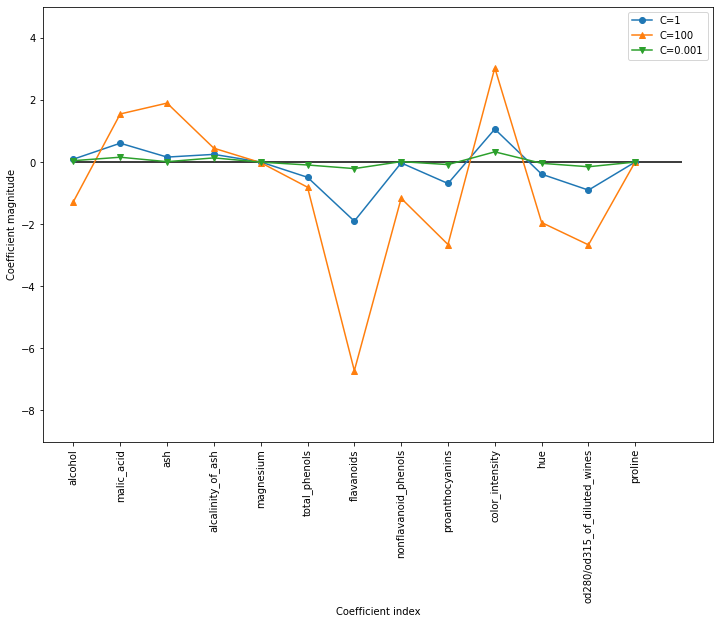

In [57]:
plt.figure(figsize=(12, 8))
plt.plot(logreg1.coef_.T, 'o-', label="C=1")
plt.plot(logreg100.coef_.T, '^-', label="C=100")
plt.plot(logreg001.coef_.T, 'v-', label="C=0.001")
plt.xticks(range(wine.data.shape[1]), wine.feature_names, rotation=90)
plt.hlines(0, 0, wine.data.shape[1])
plt.ylim(-9, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

# Zad

Narysuj wykre współrzędnych wykorzystywane przez modele z trzema różnymi ustawieniami parametru regularyzacji C i regularyzacją L1.

In [51]:
logreg1_l1 = LogisticRegression(penalty="l1", solver='liblinear', max_iter=10000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg1_l1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg1_l1.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.978


In [52]:
logreg100_l1 = LogisticRegression(C=10, penalty="l1", solver='liblinear', max_iter=10000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg100_l1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100_l1.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.978


In [53]:
logreg001_l1 = LogisticRegression(C=0.001, penalty="l1", solver='liblinear', max_iter=10000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg001_l1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001_l1.score(X_test, y_test)))

Training set score: 0.729
Test set score: 0.733


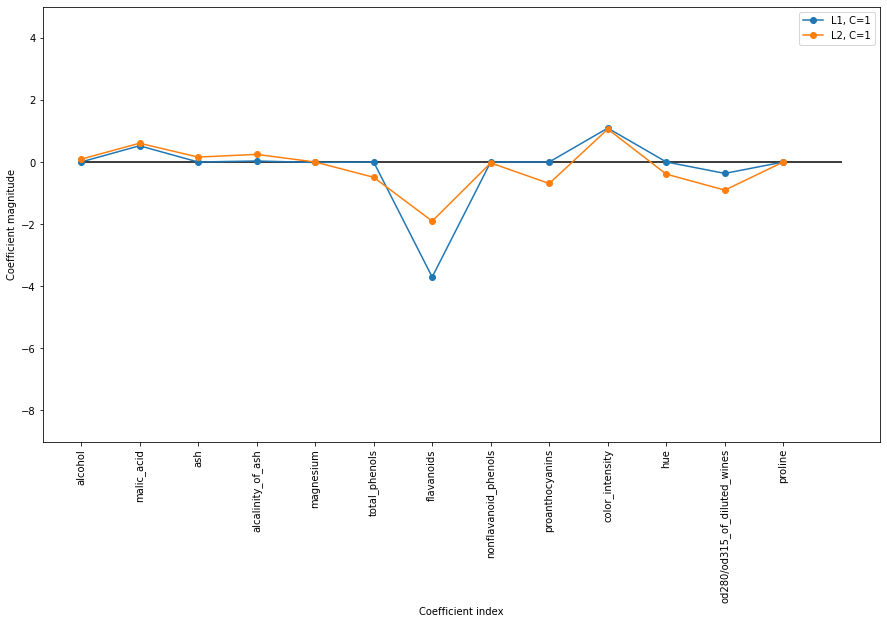

In [64]:
plt.figure(figsize=(15, 8))

plt.plot(logreg1_l1.coef_.T, 'o-', label="L1, C=1")
# plt.plot(logreg100_l1.coef_.T, '^-', label="L1, C=100")
plt.xticks(range(wine.data.shape[1]), wine.feature_names, rotation=90)

plt.plot(logreg1.coef_.T, 'o-', label="L2, C=1")
# plt.plot(logreg100.coef_.T, '^-', label="L2, C=100")

plt.hlines(0, 0, wine.data.shape[1])
plt.ylim(-9, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(logreg1_l1.coef_.T, 'o-', label="C=1")
plt.plot(logreg100_l1.coef_.T, '^-', label="C=100")
plt.plot(logreg001_l1.coef_.T, 'v-', label="C=0.001")
plt.xticks(range(wine.data.shape[1]), wine.feature_names, rotation=90)
plt.hlines(0, 0, wine.data.shape[1])
plt.ylim(-9, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()